In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os


In [4]:
path="C:/Users/nvk90/OneDrive/Desktop/DATASETS/project datasets/Gender/Gender/"

In [5]:
path_male=path+"male/"

In [6]:
path_female=path+"female/"

In [7]:
os.listdir(path_male)

['090544.jpg.jpg',
 '090545.jpg.jpg',
 '090548.jpg.jpg',
 '090550.jpg.jpg',
 '090553.jpg.jpg',
 '090557.jpg.jpg',
 '090558.jpg.jpg',
 '090559.jpg.jpg',
 '090563.jpg.jpg',
 '090567.jpg.jpg',
 '090570.jpg.jpg',
 '090571.jpg.jpg',
 '090574.jpg.jpg',
 '090575.jpg.jpg',
 '090579.jpg.jpg',
 '090581.jpg.jpg',
 '090584.jpg.jpg',
 '090586.jpg.jpg',
 '090590.jpg.jpg',
 '090594.jpg.jpg',
 '090597.jpg.jpg',
 '090603.jpg.jpg',
 '090608.jpg.jpg',
 '090610.jpg.jpg',
 '090612.jpg.jpg',
 '090614.jpg.jpg',
 '090631.jpg.jpg',
 '090634.jpg.jpg',
 '090639.jpg.jpg',
 '090646.jpg.jpg',
 '090648.jpg.jpg',
 '090652.jpg.jpg',
 '090662.jpg.jpg',
 '090663.jpg.jpg',
 '090665.jpg.jpg',
 '090668.jpg.jpg',
 '090671.jpg.jpg',
 '090674.jpg.jpg',
 '090678.jpg.jpg',
 '090682.jpg.jpg',
 '090690.jpg.jpg',
 '090694.jpg.jpg',
 '090699.jpg.jpg',
 '090700.jpg.jpg',
 '090706.jpg.jpg',
 '090708.jpg.jpg',
 '090718.jpg.jpg',
 '090720.jpg.jpg',
 '090723.jpg.jpg',
 '090729.jpg.jpg',
 '090732.jpg.jpg',
 '090746.jpg.jpg',
 '090751.jpg

In [8]:
img_female=os.listdir(path_female)

In [9]:
img_male=os.listdir(path_male)

In [25]:
img=plt.imread(path_female+img_female[0])

In [26]:
img



array([[[39, 39, 37],
        [44, 44, 42],
        [45, 45, 43],
        ...,
        [53, 53, 55],
        [56, 56, 58],
        [43, 43, 45]],

       [[34, 34, 32],
        [34, 34, 32],
        [30, 30, 28],
        ...,
        [56, 56, 58],
        [51, 51, 53],
        [65, 65, 67]],

       [[29, 29, 27],
        [34, 34, 32],
        [30, 30, 28],
        ...,
        [62, 62, 64],
        [57, 57, 59],
        [65, 65, 67]],

       ...,

       [[17, 27, 18],
        [10, 20, 11],
        [ 9, 16,  9],
        ...,
        [15, 15, 15],
        [21, 23, 22],
        [24, 26, 25]],

       [[16, 24, 13],
        [ 9, 17,  6],
        [ 9, 14,  7],
        ...,
        [19, 19, 21],
        [16, 16, 18],
        [12, 12, 14]],

       [[16, 24, 13],
        [ 9, 17,  6],
        [ 9, 14,  7],
        ...,
        [20, 20, 22],
        [18, 18, 20],
        [15, 15, 17]]], dtype=uint8)

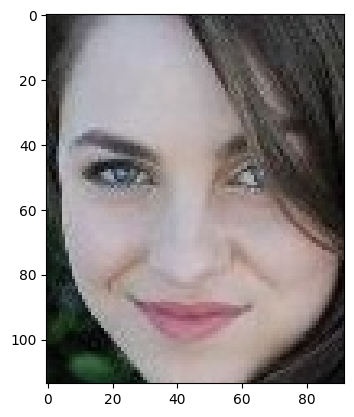

In [27]:
plt.imshow(img)

In [29]:
img1=plt.imread(path_male+img_male[0])

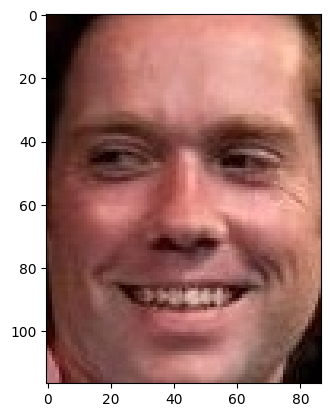

In [30]:
plt.imshow(img1)

In [31]:
img_dataset=[]
img_label=[]

In [32]:
for i in img_female:
    image=cv2.imread(path_female+i)
    image=cv2.resize(image,(100,100))
    img_dataset.append(np.array(image))
    img_label.append(0)

In [33]:
len(img_dataset)

3000

In [34]:
len(img_label)

3000

In [38]:
for j in img_male:
    image_1=cv2.imread(path_male+j)
    image_1=cv2.resize(image_1,(100,100))
    img_dataset.append(np.array(image_1))
    img_label.append(1)

In [39]:
len(img_dataset)

6000

In [40]:
len(img_label)

6000

In [41]:
img_dataset_array=np.array(img_dataset)

In [43]:
img_label_array=np.array(img_label)

## scale

In [44]:
img_dataset_array.max()

255

In [45]:
img_dataset_array.min()

0

In [46]:
img_dataset_scale=img_dataset_array/255.0

In [47]:
X=img_dataset_scale

In [48]:
y=img_label_array

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [51]:
X_train.shape

(4800, 100, 100, 3)

In [52]:
y_train.shape

(4800,)

In [53]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
smodel=Sequential()

In [56]:
smodel.add(Input(shape=(100,100,3)))

## first convutional leyer

In [57]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

## second convutional layer

In [58]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

## third convutional layer

In [59]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [60]:
smodel.add(Flatten())

## fully connected layer

In [61]:
smodel.add(Dense(units=125,activation="relu"))
smodel.add(Dense(units=64,activation="relu"))
smodel.add(Dense(units=128,activation="relu"))
smodel.add(Dense(units=2,activation="softmax"))

In [62]:
smodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [66]:
smodel.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [67]:
smodel.fit(X_train,y_train,epochs=15)

Epoch 1/15
150/150 [==============================] - 46s 279ms/step - loss: 0.6291 - accuracy: 0.6317
Epoch 2/15
150/150 [==============================] - 48s 318ms/step - loss: 0.4118 - accuracy: 0.8181
Epoch 3/15
150/150 [==============================] - 42s 277ms/step - loss: 0.3200 - accuracy: 0.8698
Epoch 4/15
150/150 [==============================] - 42s 277ms/step - loss: 0.2549 - accuracy: 0.9044
Epoch 5/15
150/150 [==============================] - 41s 276ms/step - loss: 0.2488 - accuracy: 0.9023
Epoch 6/15
150/150 [==============================] - 42s 277ms/step - loss: 0.2090 - accuracy: 0.9177
Epoch 7/15
150/150 [==============================] - 42s 279ms/step - loss: 0.2048 - accuracy: 0.9225
Epoch 8/15
150/150 [==============================] - 46s 305ms/step - loss: 0.1863 - accuracy: 0.9317
Epoch 9/15
150/150 [==============================] - 43s 286ms/step - loss: 0.1690 - accuracy: 0.9315
Epoch 10/15
150/150 [==============================] - 52s 344ms/step - l

In [68]:
smodel.evaluate(X_test,y_test)

38/38 [==============================] - 3s 69ms/step - loss: 0.1818 - accuracy: 0.9283


[0.18180617690086365, 0.9283333420753479]

In [74]:
img_p=X_train[3344].reshape((1,)+X_train[3344].shape)

In [75]:
smodel.predict(img_p)

1/1 [==============================] - 0s 387ms/step


array([[0.00671367, 0.9932863 ]], dtype=float32)

In [76]:
np.argmax(smodel.predict(img_p))

1/1 [==============================] - 0s 56ms/step


1

In [80]:
img_p

array([[[[0.4       , 0.49411765, 0.56862745],
         [0.24313725, 0.34117647, 0.42352941],
         [0.22745098, 0.3254902 , 0.41568627],
         ...,
         [0.20392157, 0.28235294, 0.38823529],
         [0.10588235, 0.18039216, 0.28627451],
         [0.10588235, 0.18039216, 0.28627451]],

        [[0.45490196, 0.54901961, 0.63137255],
         [0.27843137, 0.37254902, 0.45882353],
         [0.13333333, 0.23137255, 0.3254902 ],
         ...,
         [0.24313725, 0.3254902 , 0.43529412],
         [0.21176471, 0.29411765, 0.4       ],
         [0.2745098 , 0.34901961, 0.45490196]],

        [[0.43137255, 0.52941176, 0.61176471],
         [0.26666667, 0.37254902, 0.45882353],
         [0.18431373, 0.29411765, 0.38823529],
         ...,
         [0.25882353, 0.34509804, 0.4627451 ],
         [0.27843137, 0.36470588, 0.4745098 ],
         [0.36862745, 0.45490196, 0.56470588]],

        ...,

        [[0.98431373, 1.        , 0.97647059],
         [0.98823529, 0.99607843, 0.98039216]

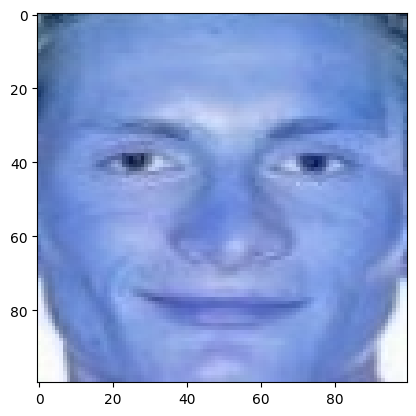

In [81]:
plt.imshow(X_train[3344])

In [83]:
fe_img=X_train[3254].reshape((1,)+X_train[3254].shape)

In [84]:
fe_img.shape

(1, 100, 100, 3)

In [85]:
smodel.predict(fe_img)

1/1 [==============================] - 0s 56ms/step


array([[9.9930251e-01, 6.9750944e-04]], dtype=float32)

In [86]:
np.argmax(smodel.predict(fe_img))

1/1 [==============================] - 0s 64ms/step


0

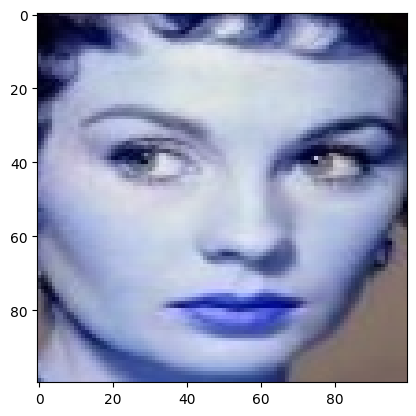

In [87]:
plt.imshow(X_train[3254])

In [114]:
path_1="C:/Users/nvk90/Downloads/vamshi pass port photo.JPG"

In [115]:
vam=cv2.imread(path_1)

In [116]:
vam=cv2.resize(vam,(100,100))

In [117]:
vam.shape

(100, 100, 3)

In [118]:
vam_1=vam.reshape((1,)+vam.shape)

In [119]:
vam_1.shape

(1, 100, 100, 3)

In [120]:
smodel.predict(vam_1)

1/1 [==============================] - 0s 63ms/step


array([[0., 1.]], dtype=float32)

In [122]:
np.argmax(smodel.predict(vam_1))

1/1 [==============================] - 0s 48ms/step


1

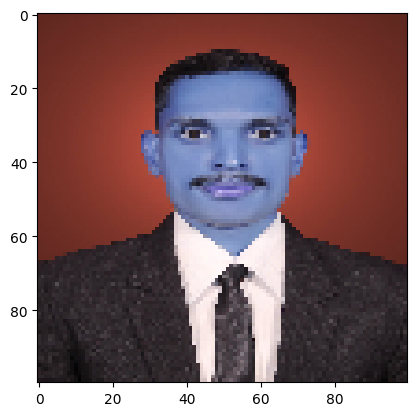

In [123]:
plt.imshow(vam)